In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline 


In [3]:
df=pd.read_csv("Travel_and_Commuting_Preferences_cleaned.csv")

In [4]:
df.head()

,Unnamed: 0,Name,Age,Gender,Mode_of_transport,Distance(in_km),Time_taken(min),Amount_spent_monthly,Satisfaction
0,0,Vedant Sunil Patil,17,Male,Bus,20.0,120.0,800.0,3
1,1,VISHISHT PAL,17,Male,Bike/ Scoter (Petrol),3.0,10.0,500.0,3
2,4,Yash Dharao,19,Male,Bike/ Scoter (Petrol),12.0,25.0,2000.0,3
3,5,Raj Upadhye,19,Male,Walking,1.2,30.0,0.0,5
4,6,Romit,18,Male,Bus,5.0,20.0,15.0,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            72 non-null     int64  
 1   Name                  72 non-null     object 
 2   Age                   72 non-null     int64  
 3   Gender                72 non-null     object 
 4   Mode_of_transport     72 non-null     object 
 5   Distance(in_km)       72 non-null     float64
 6   Time_taken(min)       72 non-null     float64
 7   Amount_spent_monthly  72 non-null     float64
 8   Satisfaction          72 non-null     int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 5.2+ KB


In [6]:
df.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Gender', 'Mode_of_transport',
       'Distance(in_km)', 'Time_taken(min)', 'Amount_spent_monthly',
       'Satisfaction'],
      dtype='object')

In [7]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [8]:
[i for i in df.columns if df[i].dtype!="O"]

['Age',
 'Distance(in_km)',
 'Time_taken(min)',
 'Amount_spent_monthly',
 'Satisfaction']

<Axes: >

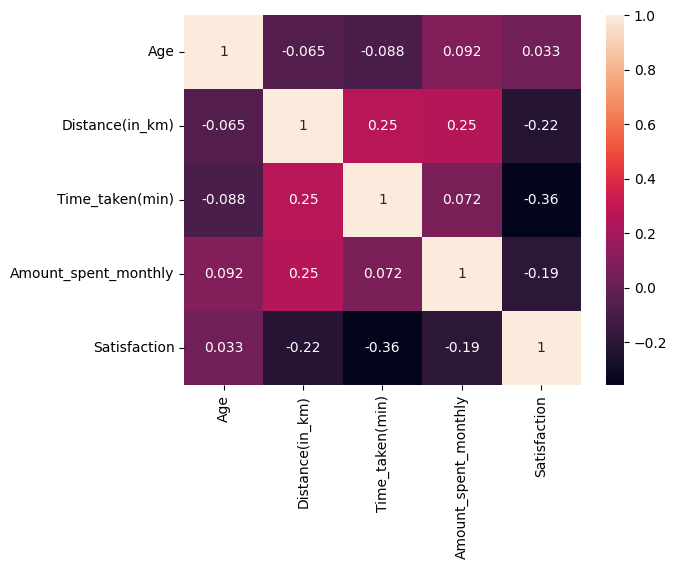

In [9]:
sns.heatmap(df[[i for i in df.columns if df[i].dtype!="O"]].corr(),annot=True)

In [10]:
X=df.drop(columns=['Age','Name','Gender','Satisfaction'])
y=df['Satisfaction']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [12]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder,StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
X_num=[i for i in X.columns if X[i].dtype !='O']
x_cat=[i for i in X.columns if i not in X_num]
Transformer=ColumnTransformer(transformers=[("StandardScaler",StandardScaler(),X_num),("OneHotEncoder",OneHotEncoder(),x_cat)],
                              )
X_train=Transformer.fit_transform(X_train)
X_test=Transformer.transform(X_test)


In [50]:
## USing Random forest classifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import roc_auc_score,f1_score, recall_score,accuracy_score
random_forest=AdaBoostClassifier()
random_forest.fit(X_train,y_train)
y_pred=random_forest.predict(X_test)

## Calculating the metrics score 

accuracy_score_=accuracy_score(y_test,y_pred)
f1_score_=f1_score(y_test,y_pred,average="weighted")
recall_score_=recall_score(y_test,y_pred,average="weighted")

## Printing out the scores 
print(f"accuracy_score : {accuracy_score_} ")
print(f"f1_score : {f1_score_} ")
print(f"recall_score : {recall_score_} ")


accuracy_score : 0.16666666666666666 
f1_score : 0.10052910052910052 
recall_score : 0.16666666666666666 
